In [7]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from topoflow.components import met_base

In [8]:
cfg_file='topoflow/examples/Treynor_Iowa/June_20_67_meteorology.cfg'
m=met_base.met_component()

In [9]:
m.initialize(cfg_file);
# NOTE met_base will initialize , but not update without h_snow (snow_component)
m.h_snow=0.5

 
Meteorology component: Initializing...
Scalar rainrate set to: 5.55555555556e-05  [mmph]
SORRY: Cannot yet create lon and lat grids for
       this DEM because it uses UTM coordinates.
       Will use lat/lon for Denver, Colorado.
 
Imported netCDF4 version: 1.1.9


In [10]:
time = [m.get_current_time().copy()]
# NOTE: EMELI does not have get_value
T_air = [m.get_values('atmosphere_bottom_air__temperature').copy()]
p0 = [m.get_values('atmosphere_bottom_air__pressure').copy()] 
Qn_LW = [m.get_values('land_surface_net-longwave-radiation__energy_flux').copy()]
Qn_SW = [m.get_values('land_surface_net-shortwave-radiation__energy_flux').copy()]
Q_sum = [m.get_values('land_surface_net-total-energy__energy_flux').copy()]

while m.get_current_time() < m.get_end_time():
    print m.get_current_time(), m.get_end_time()
    m.update()
    time.append(m.get_current_time().copy())
    T_air.append(m.T_air.copy() )
    p0.append(m.p0.copy() )
    Qn_LW.append(m.Qn_LW.copy() )
    Qn_SW.append(m.Qn_SW.copy() )
    Q_sum.append(m.Q_sum.copy() )
    
print np.shape(time), np.shape(T_air),np.shape(p0)
print np.shape(Qn_LW), np.shape(Qn_SW), np.shape(Q_sum)

0.0 600.0
60.0 600.0
120.0 600.0
180.0 600.0
240.0 600.0
300.0 600.0
360.0 600.0
420.0 600.0
480.0 600.0
540.0 600.0
(11,) (11,) (11,)
(11,) (11, 44, 29) (11, 44, 29)


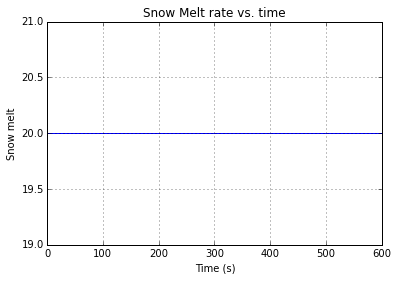

In [15]:
plt.plot(time,T_air,'b'); 
plt.xlabel('Time (s)')
plt.ylabel('Snow melt')
plt.title('Snow Melt rate vs. time')
plt.grid(); plt.show()